In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading dataset

data = keras.datasets.fashion_mnist

# spli the dataset into testing and training datasets
(train_images, train_labels), (test_images, test_labels) = data.load_data()



In [3]:
print(train_labels[6])

"""
    create a list to clearly define the labels
    Apparently the labels are from 0 to 9
"""

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


7


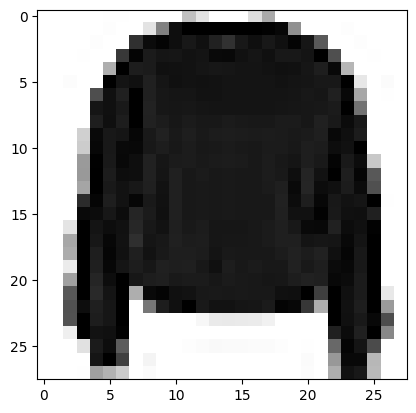

In [4]:
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

In [5]:
print(train_images[7])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images[7])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
"""
    Defining the model:
     - Concentrate on the architecture of the layers
"""


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),

])

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
# Model Training
model.fit(train_images, train_labels, epochs=10) # epoch is for tweeking the same images the network

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Model Accuracy : {test_acc}  ==> Test Loss: {test_loss}')


Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2804 - accuracy: 0.8958
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2678 - accuracy: 0.8998
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2575 - accuracy: 0.9035
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2455 - accuracy: 0.9078
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2385 - accuracy: 0.9115
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2309 - accuracy: 0.9150
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2211 - accuracy: 0.9166
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2142 - accuracy: 0.9193
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2063 - accuracy: 0.9215
Epoch 10/10
313/313 [==============================] - 2s 8ms/st

313/313 [==============================] - 2s 7ms/step


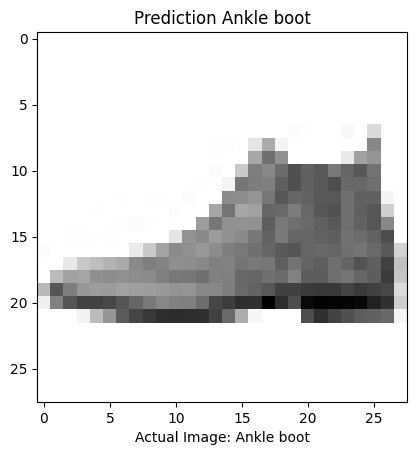

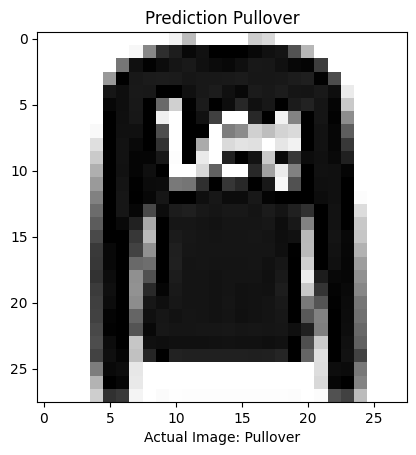

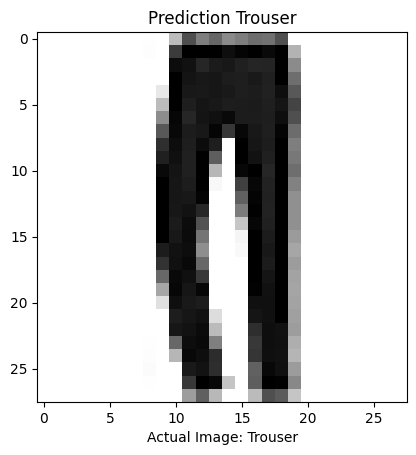

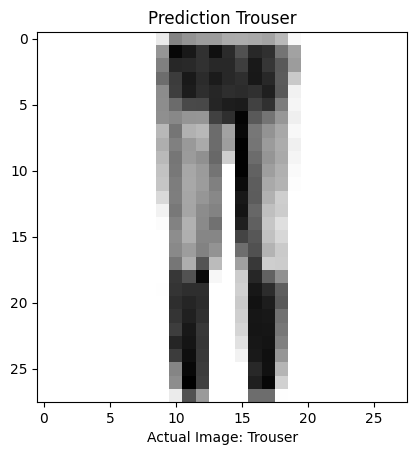

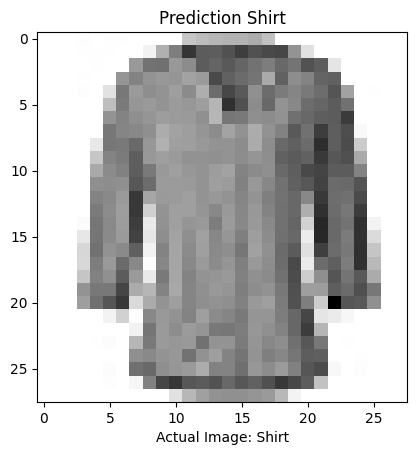

In [17]:
"""Predicting Individual Images using the created model"""
prediction = model.predict(test_images)

# find the actual image used for the prediction
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual Image: " + class_names[test_labels[i]])
    plt.title("Prediction " + class_names[np.argmax(prediction[i])])
    plt.show()


#print(f'Prediction ==> {class_names[np.argmax(prediction[0])]}') # take the highest prediction value as the prediction value